In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(
    n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0
)

In [4]:
X

array([[-1.53326877, -1.69592044],
       [ 1.95478496,  0.1237999 ],
       [ 0.5122803 , -1.69194158],
       ...,
       [ 0.65035077,  1.22257251],
       [-0.77803326,  0.91884786],
       [-1.94921114,  2.18023153]])

In [5]:
y

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [6]:
pd.DataFrame(X)[0]

0     -1.533269
1      1.954785
2      0.512280
3      0.362573
4     -1.918800
         ...   
995   -1.202603
996    1.160267
997    0.650351
998   -0.778033
999   -1.949211
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

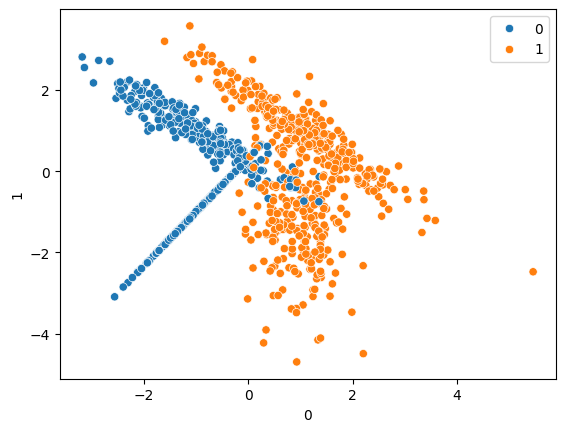

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10
)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC(kernel="linear")

In [11]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
svc.coef_

array([[2.25636995, 0.28305856]])

In [13]:
## Prediction
y_pred = svc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       126
           1       0.87      0.94      0.90       124

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[108  18]
 [  8 116]]


In [16]:
rbf = SVC(kernel="rbf")

In [17]:
rbf.fit(X_train, y_train)

SVC()

In [18]:
## Prediction
y_pred1 = rbf.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       126
           1       0.94      1.00      0.97       124

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

[[118   8]
 [  0 124]]


In [20]:
polynomial = SVC(kernel="poly")
polynomial.fit(X_train, y_train)
## Prediction
y_pred2 = polynomial.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       126
           1       0.94      0.90      0.92       124

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[119   7]
 [ 12 112]]


In [21]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train, y_train)
## Prediction
y_pred3 = sigmoid.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       126
           1       0.85      0.94      0.89       124

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.89      0.88      0.88       250

[[105  21]
 [  8 116]]


In [22]:
sigmoid.intercept_

array([1.16196999])

### Hyperparametere Tuning With SVC


In [23]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}

In [24]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [25]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [26]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [27]:
## Prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       126
           1       0.94      0.99      0.96       124

    accuracy                           0.96       250
   macro avg       0.97      0.96      0.96       250
weighted avg       0.97      0.96      0.96       250

[[118   8]
 [  1 123]]
